# Two-Body example notebook for polaris module

Yuri Shimane

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [4]:
import sys
sys.path.append('../')

import polaris.SolarSystemConstants as sscs
import polaris.Keplerian as kepl
import polaris.Propagator as prop

In [5]:
# get GM value
gm = sscs.get_gm("399")[0]

In [14]:
state0 = np.array([7000.0, 0.0, -200.0, 0.0, 6.8, 0.0])
elts = kepl.sv2elts(state0, gm)
elts

{'hvec': array([ 1360.,    -0., 47600.]),
 'incl': 0.02856365783875954,
 'evec': array([-0.18755083,  0.        ,  0.0053586 ]),
 'raan': 1.5707963267948966,
 'omega': 1.5707963267948966,
 'theta': 3.141592653589793}

In [27]:
propout = prop.propagate_twobody(gm, state0, 4600)

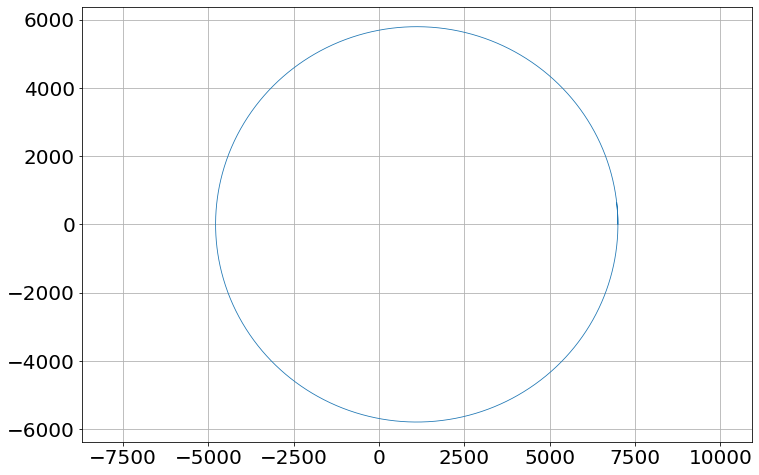

In [28]:
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.plot(propout["xs"], propout["ys"], linewidth=0.8)
plt.grid(True)
plt.axis("equal")
plt.show()

In [34]:
data = [propout["xs"], propout["ys"], propout["zs"]]
df = pd.DataFrame(data, index=['xs', 'ys', 'zs']).T
fig = px.line_3d(df, x="xs", y="ys", z="zs")
fig.show()